# <p align="center"><b>📱 **Phil's Phones: Exploring Mobile Phone Sales and Predictive Modeling** 📈</b></p>

The mobile phone industry is a rapidly growing and dynamic sector. As one of the major drivers of the global economy, this industry is marked by intense competition and constant technological breakthroughs. Key players in the market, such as Apple, Samsung, and Huawei, continually strive to innovate and bring unique product offerings to the table. With a market valuation of approximately $714 billion in 2021, and it is projected to experience sustained growth in the coming years. This growth can be attributed to factors such as the rise of emerging markets, the expansion of 5G networks, and the increasing demand for high-performance devices.

Phil's Phones, a large mobile phone selling chain, with both in-store and online presence, is well-positioned to capitalize on this expansive market, catering to a diverse range of consumer preferences. By gaining a thorough understanding of the mobile phone market's size, future prospects, and key players, Phil's Phones can develop effective strategies for business growth and maintain a competitive edge in this constantly changing environment.

# Analyzing the Mobile Phone Market for Phil's Phones

## Introduction

In the rapidly evolving landscape of the mobile phone industry, staying competitive requires not only an understanding of market dynamics but also the ability to harness the power of data. This is precisely where our journey begins with Phil's Phones, a prominent mobile phone retail chain with a vision for innovation.

**Phil's Phones**, led by its visionary CEO, Phil, has long been a formidable player in the mobile phone retail business. With a diverse range of smartphones from leading brands, the company has amassed a substantial dataset of sales records. However, in a bold move, Phil has decided to expand the company's horizons by venturing into the creation of its own series of smartphones.

As a newly appointed Data Analyst at Phil's Phones, your role is pivotal in this transformative journey. Phil has entrusted you with a mission: to dive deep into the world of mobile phones, analyze market trends, devise pricing strategies, and determine the optimal specifications that align with current market demands. In essence, your task is to steer Phil's Phones into a future where data-driven decisions are paramount.

## Objectives and Goals

Your case study has a multifaceted set of objectives:

1. **Market Understanding**: Conduct comprehensive research on the mobile phone industry. This includes delving into the industry's size, future trends, key players, and the dynamics that shape it. The goal is to gain insights that will inform strategic decisions.

2. **Data Analysis Framework**: Establish a robust data analytics framework tailored to Phil's Phones' unique needs. This framework should encompass everything from data preprocessing to model building and evaluation.

3. **Price Prediction Model**: Develop a predictive model that can determine the price category of smartphones based on their specifications. This model should serve as a compass for pricing strategies, helping maximize profitability.

4. **Battery Power Prediction**: Focus on a specific task - predicting the battery power of high-priced smartphones. A critical decision awaits Phil regarding the battery power of the upcoming Condor phone, and your model will guide this decision.

5. **Price Category Classification**: Build a classification model that can accurately classify the price category of phones. In a volatile market, this model will help Phil make informed decisions about stocking and pricing.

6. **Outlier Detection**: Utilize an autoencoder to identify outliers in the dataset. By pinpointing unusual data points, you can assist in quality control and anomaly detection.

7. **Dimensionality Reduction**: Explore innovative ways to visualize complex data. A dimensionality reduction technique using an autoencoder will enable you to gain new perspectives on the dataset.

Through this case study, we will not only apply our data analysis skills but also contribute significantly to the growth and competitiveness of Phil's Phones. As you embark on this analytical journey, remember that every insight gained is a step closer to shaping the future of a company eager to make its mark in the mobile phone industry.

Let's begin our exploration into the world of mobile phones and data-driven decision-making.


# Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torch.optim as optim

In [18]:
# Just to ignore the warnings that may be generated during the execution of the code
import warnings
warnings.filterwarnings("ignore")

# Load data

In [19]:
import pandas as pd
phones = pd.read_csv(".../phone_data (1).csv")

# Domain knowledge


In this dataset, we are presented with a variety of columns that describe different specifications and features of mobile phones. These columns are essential for understanding the characteristics of each phone model. Let's delve into what each column represents:

In [20]:
print(f'The columns are, in order : {list(phones.columns)}')

The columns are, in order : ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']


| Column Name    | Description                                        |
| ---------------| -------------------------------------------------- |
| battery_power  | Total energy a battery can store in one time measured in mAh |
| lock_speed    | Clock speed of the mobile phone's processor (measured in GHz) |
| fc             | Front camera megapixels                            |
| int_memory     | Internal memory in gigabytes                       |
| m_dep          | Mobile depth in centimeters (cms)                  |
| mobile_wt      | Mobile weight in grams                             |
| n_cores        | Number of cores of the mobile phone's processor    |
| pc             | Pixel resolution height                            |
| px_height      | Pixel resolution width                             |
| ram            | Random Access Memory (RAM) in megabytes             |
| sc_h           | Screen height in centimeters (cms)                  |
| sc_w           | Screen width in centimeters (cms)                   |
| talk_time      | Longest time the battery will last while talking   |
| price_range    | Category for the phone's price (e.g., High, Medium, Low) |


In [21]:
phones.clock_speed.describe()

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

The ***clock_speed*** column represents the most fundamental measurement of a processor's quickness, the speed at which the processor in the phone operates. Specifically, it refers to the number of cycles per second that the processor can perform, usually measured in gigahertz (GHz). Today's fastest mobile processors have clock speeds ranging from 2.5 GHz to 3.5 GHz, with some models exceeding 4 GHz.

the descriptive statistics for the clock_speed column suggest that the average clock speed of the phones in the dataset is 1.522 GHz which is below the state of the art range mentioned earlier, but there is some variation with a few phones having clock speeds up to 3.0 GHz.

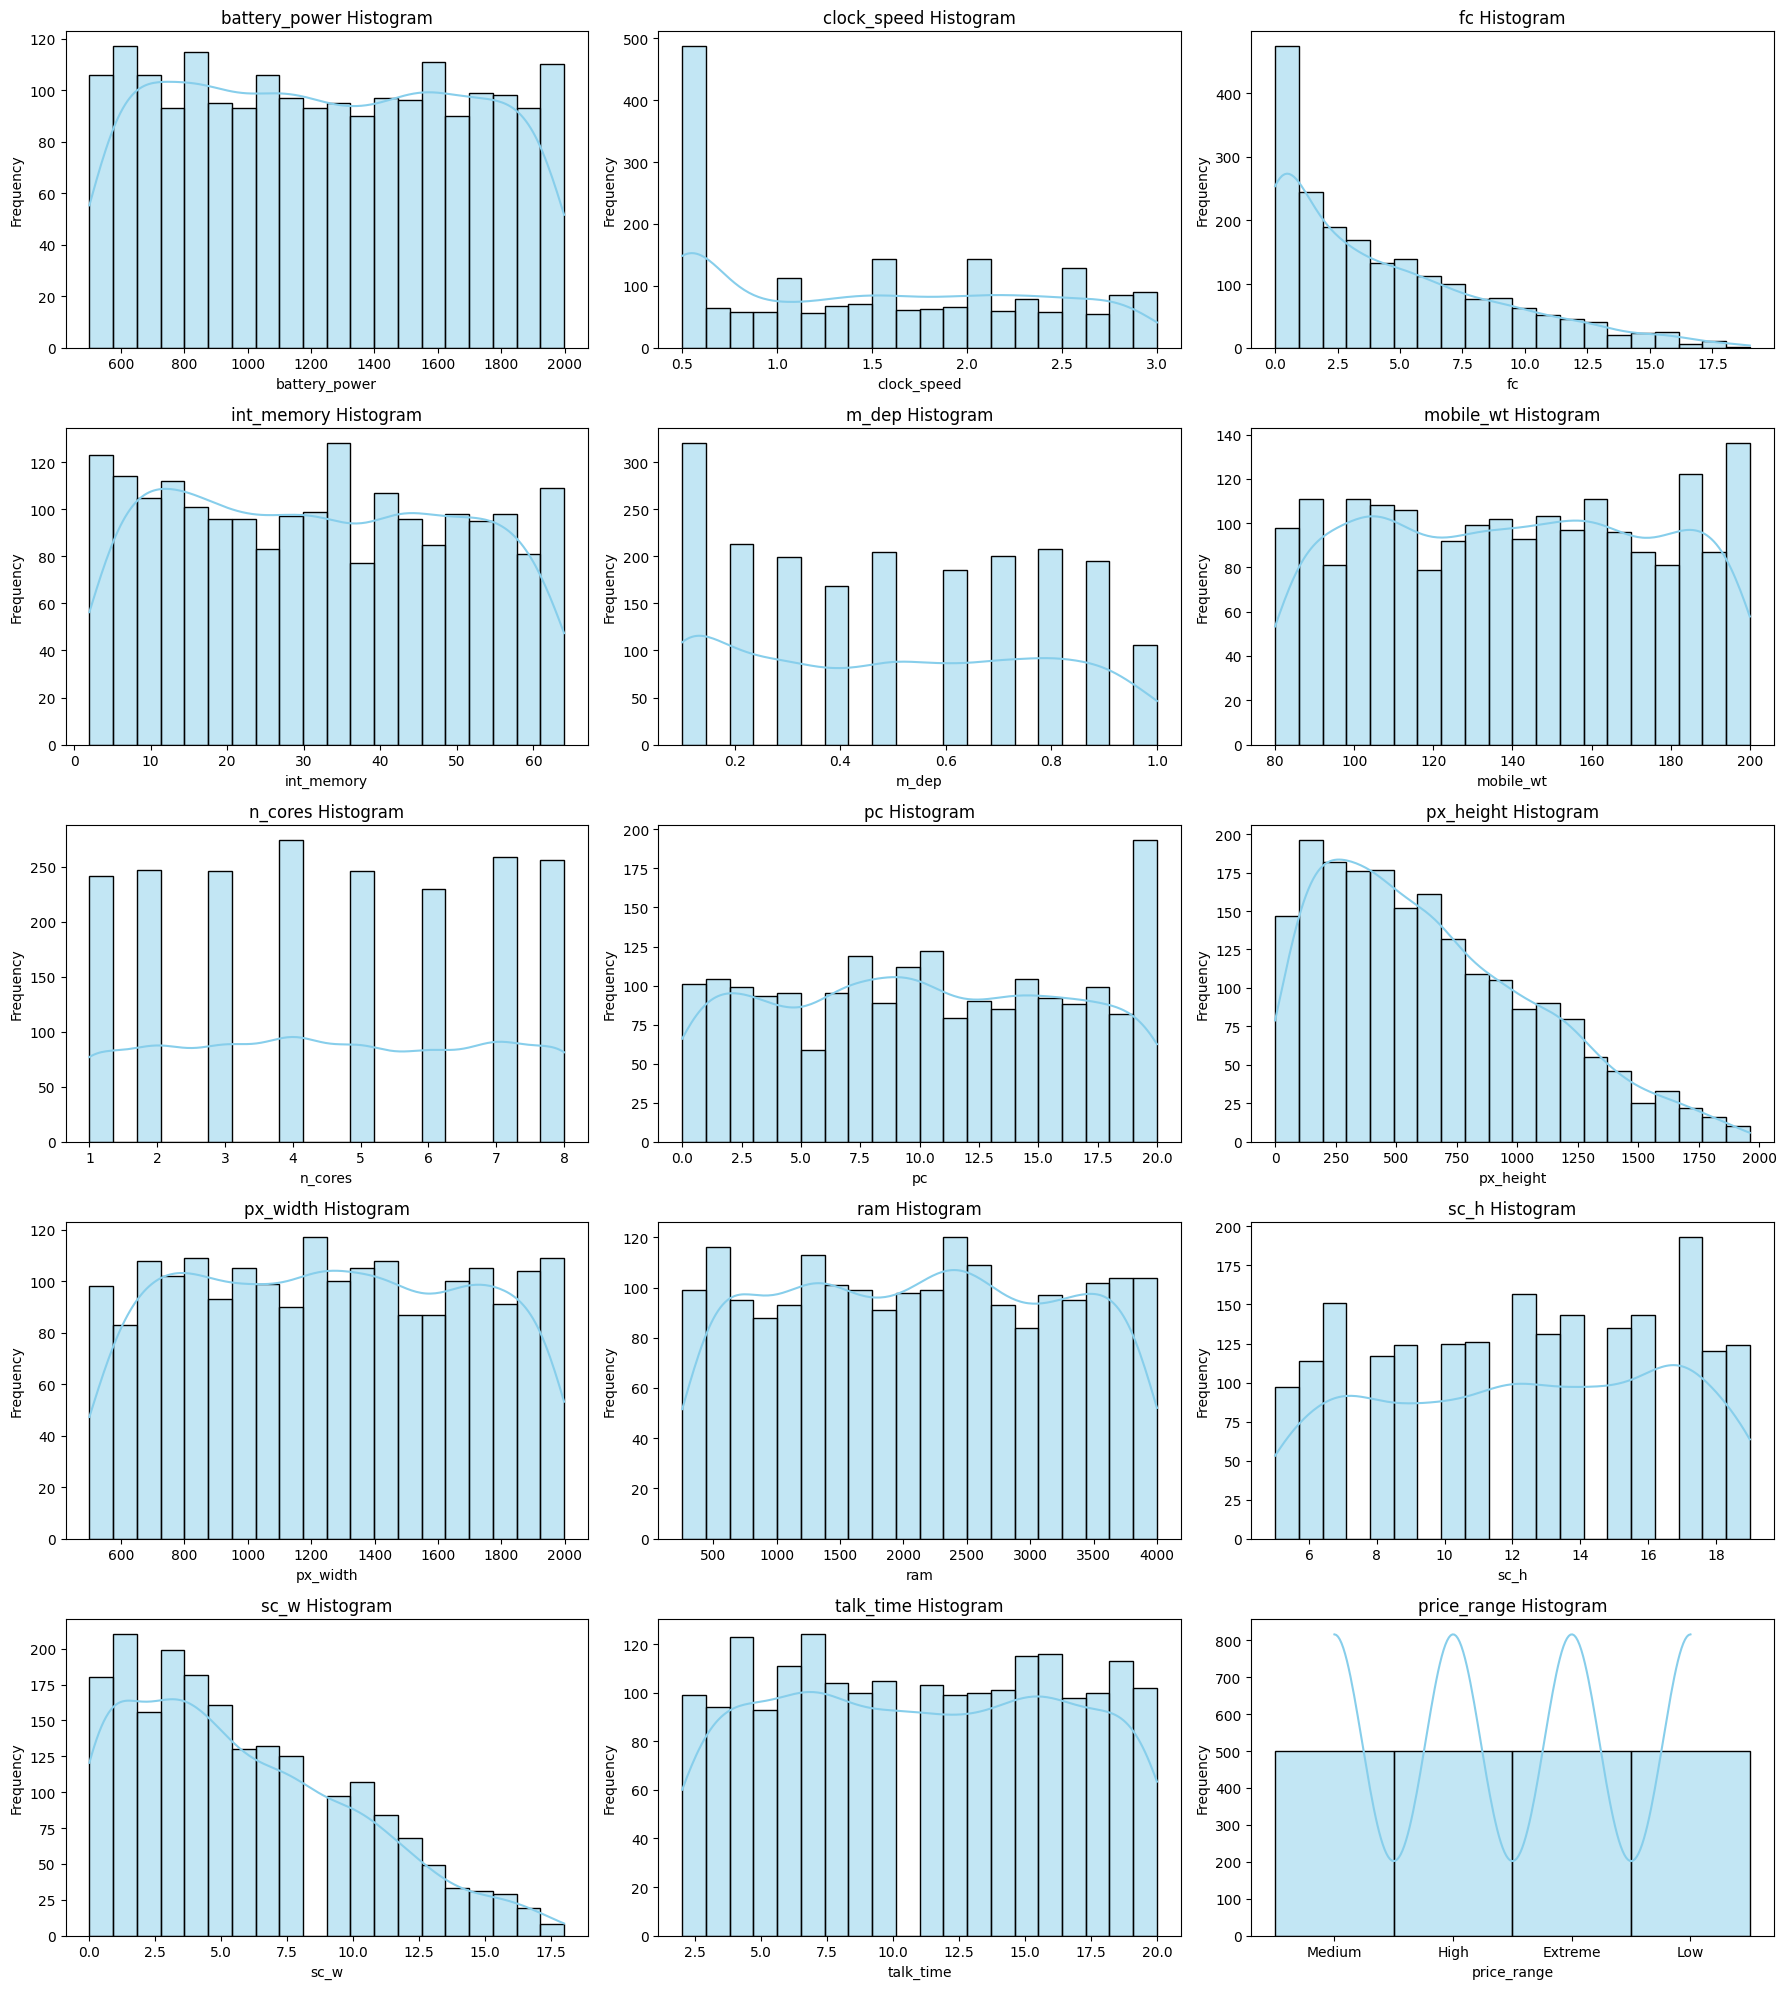

In [22]:
# columns we want to visualize with histograms
columns_to_visualize_with_histograms = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']

# Calculate the number of rows needed
num_rows = (len(columns_to_visualize_with_histograms) + 2) // 3

# Create subplots with three histograms in each row
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 4*num_rows))
for i, col in enumerate(columns_to_visualize_with_histograms):
    row = i // 3
    col_in_row = i % 3
    sns.histplot(data=phones, x=col, bins=20, kde=True, color="skyblue", ax=axes[row, col_in_row])
    axes[row, col_in_row].set_title(f"{col} Histogram")
    axes[row, col_in_row].set_xlabel(col)
    axes[row, col_in_row].set_ylabel("Frequency")

# Remove any empty subplots
#for i in range(len(columns_to_visualize_with_histograms), num_rows*3):
#   fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()


# Decision-making framework


A model that predicts price category from various phone characteristics would be useful for several reasons :
First, it would help Phil's Phones define the key factors and the most important phone characteristics in determining price range. Therefore the company could use it in order to maximize profitability by optimizing product development and pricing strategies. 
Second, the model could be used to provide guidance to sales staff and customers in-store or online, by recommending phones in a particular price range based on desired features.

By providing insight into the relationship between phone characteristics and price range, Phil's Phones would be able to make more informed decisions about which features to prioritize and how to price their products.

To roll out and use the model within the company, it would need to be integrated into the company's sales and marketing processes : 
Sales staff can use the model to make recommendations to customers, and marketing teams can use it to develop targeted advertising and pricing strategies. It could also be used into the company's website or mobile app, allowing customers to receive personalized product recommendations based on their preferred features and budget.


# Data Analytics Lifecycle

* **Problem Formulation - Business issue understanding**: Predict the price category of a phone based on its characteristics.
* **Data Collection**: Collect data on various phone characteristics: battery power, clock speed, front and primary camera megapixels, internal memory, screen height and width... It can be collected from various sources, including online marketplaces, phone manufacturers...
* **Data Preparation**: Clean and preprocess the data to prepare it for analysis: handling missing values, outliers, normalizing or standardizing numerical features...
* **Exploratory Analysis/ Modeling** : 
Exploratory Data Analysis: Explore the data to gain insights and identify any patterns or relationships between the features and the target  (price range). 
Feature Engineering: Create new features or transform existing features to better capture the relationships between the features and the target variable. 
Model Selection & training: Select an appropriate model to train and test on the data. 

* **Validation** : Model Evaluation: Evaluate the trained model on a separate test set to measure its performance and identify any issues such as overfitting or underfitting. Metrics such as accuracy, precision, recall, and F1 score can be used to evaluate the model's performance.
* **Visualization & Presentation** : 
* **Deployment**: Deploy the trained model in a production environment, such as a mobile app or a web application, to predict the price  of new phones based on their characteristics.

The analytics types used in this framework could include descriptive analytics (e.g., data cleaning and preprocessing, exploratory data analysis), predictive analytics (e.g., model selection and training, feature engineering), and prescriptive analytics (e.g., using the model to make predictions and optimize business decisions). The data required would include various phone characteristics and their corresponding price categories. The output types would include the trained machine learning model, evaluation metrics, and predicted price categories for new phones.

# Pre-processing


Before we dive into the intricacies of exploratory data analysis (EDA) and predictive modeling, it's crucial to prepare our dataset. This involves tasks like data normalization and conversion to a suitable format. In this section, we'll perform these essential pre-processing steps to ensure our data is ready for analysis and modeling.

In [23]:
phones.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,Medium
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,High
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,High
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,High
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,Medium


In [24]:
# Create an array, called p_num, containing only the numeric columns and normalize it to have mean 0 and standard deviation 1.
p_num = phones.select_dtypes(include=[int, float])
scaler = StandardScaler()
p_num= scaler.fit_transform(p_num)
print(p_num)

[[-0.90259726  0.83077942 -0.76249466 ... -0.78498329  0.2831028
   1.46249332]
 [-0.49513857 -1.2530642  -0.99289039 ...  1.11426556 -0.63531667
  -0.73426721]
 [-1.5376865  -1.2530642  -0.53209893 ... -0.31017108 -0.86492153
  -0.36814045]
 ...
 [ 1.53077336 -0.76274805 -0.76249466 ... -0.78498329 -1.0945264
  -1.10039396]
 [ 0.62252745 -0.76274805 -0.07130748 ...  1.35167167  0.9719174
   1.46249332]
 [-1.65833069  0.58562134  0.15908825 ...  1.58907778 -0.4057118
  -1.6495841 ]]


In [25]:
# Convert p_num to a tensor.
p_num = torch.from_numpy(p_num)
print(p_num)

tensor([[-0.9026,  0.8308, -0.7625,  ..., -0.7850,  0.2831,  1.4625],
        [-0.4951, -1.2531, -0.9929,  ...,  1.1143, -0.6353, -0.7343],
        [-1.5377, -1.2531, -0.5321,  ..., -0.3102, -0.8649, -0.3681],
        ...,
        [ 1.5308, -0.7627, -0.7625,  ..., -0.7850, -1.0945, -1.1004],
        [ 0.6225, -0.7627, -0.0713,  ...,  1.3517,  0.9719,  1.4625],
        [-1.6583,  0.5856,  0.1591,  ...,  1.5891, -0.4057, -1.6496]],
       dtype=torch.float64)


In [26]:
# Create a variable called p_price which is a tensor containing price values, encoded to integers 
# and formatted ready to be used as the output layer of a neural network.
le = LabelEncoder()
p_price = le.fit_transform(phones.price_range)
print(p_price)

[3 1 1 ... 0 2 0]


With our data successfully pre-processed, we now have a normalized dataset to work with. Let's move forward and explore the data further.

# Data exploration – Part 1


In this section, we initiate our data exploration journey by creating two 3D scatterplots. These visualizations will provide us with initial insights into how specific attributes relate to the price range of mobile phones. We'll focus on variables like RAM, clock speed, internal memory, front camera megapixels (fc), pixel height (px_height), and mobile weight, using color to represent price ranges. Through these visualizations, we aim to uncover potential patterns and trends that influence mobile phone pricing.

In [27]:
# Map integer labels to category names: to get the corresponding categories of each number 
category_names = le.inverse_transform([0, 1, 2, 3])
print(category_names)

['Extreme' 'High' 'Low' 'Medium']


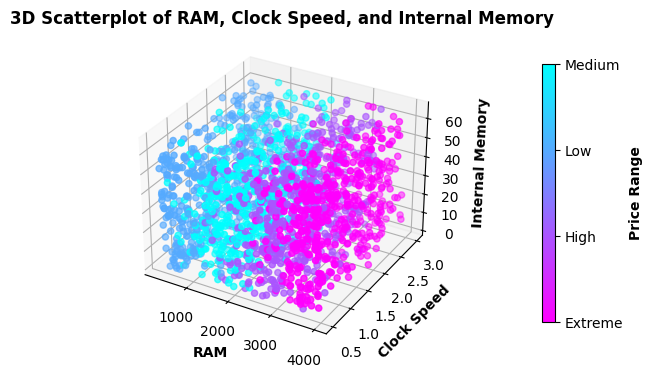

In [28]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the variables for the plot
x = phones.ram
y = phones.clock_speed
z = phones.int_memory

# Create scatterplot
scatter = ax.scatter(x, y, z, c= p_price, cmap='cool_r')

# Add labels and title
ax.set_xlabel('RAM', fontdict={'weight': 'bold'})
ax.set_ylabel('Clock Speed', fontdict={'weight': 'bold'})
ax.set_zlabel('Internal Memory', fontdict={'weight': 'bold'})
ax.set_title('3D Scatterplot of RAM, Clock Speed, and Internal Memory', fontdict={'weight': 'bold'})

# Add colorbar
colorbar = fig.colorbar(scatter, ticks=[0,1,2,3], pad=0.2, shrink=0.7)
colorbar.set_label('Price Range', fontdict={'weight': 'bold'})
colorbar.ax.set_yticklabels(category_names)

# Show the plot
plt.show()


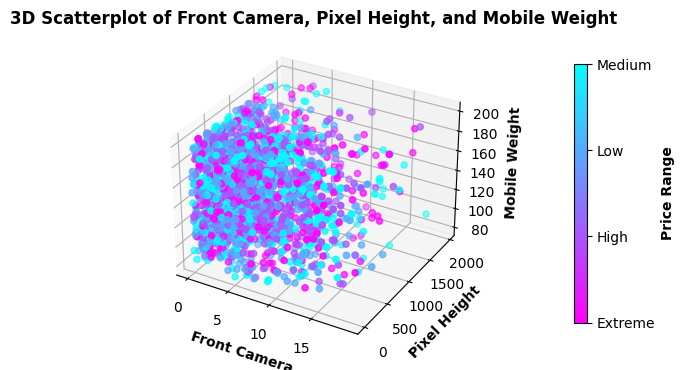

In [29]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the variables for the plot
x = phones.fc
y = phones.px_height
z = phones.mobile_wt
c = p_price

# Create scatterplot
scatter = ax.scatter(x, y, z, c=c, cmap='cool_r')

# Add labels and title
ax.set_xlabel('Front Camera', fontdict={'weight': 'bold'})
ax.set_ylabel('Pixel Height', fontdict={'weight': 'bold'})
ax.set_zlabel('Mobile Weight', fontdict={'weight': 'bold'})
ax.set_title('3D Scatterplot of Front Camera, Pixel Height, and Mobile Weight', fontdict={'weight': 'bold'})

# Create a colorbar
colorbar = fig.colorbar(scatter, ticks=[0, 1, 2, 3], pad=0.2, shrink=0.7)
colorbar.set_label('Price Range', fontdict={'weight': 'bold'})
colorbar.ax.set_yticklabels(category_names)

# Show the plot
plt.show()


It seems that the first 3D scatterplot of RAM, clock speed, and internal memory colored by price range shows distinct price categories and that RAM is a key factor in determining the price range, suggesting that higher RAM is likely associated with higher prices.

On the other hand, in the 3D scatterplot of fc, px_height, and mobile_wt colored by price range, the price categories are not as clearly distinguishable, suggesting that these three characteristics may not be as critical factors in determining the price.

Overall, the plots provide insight into how different features of the phone may be related to its price and how different features may have varying degrees of importance in determining the price.

# Q6b. Data exploration – Part 2


## Paiplots of ram, int_memory and battery_power by price_range  

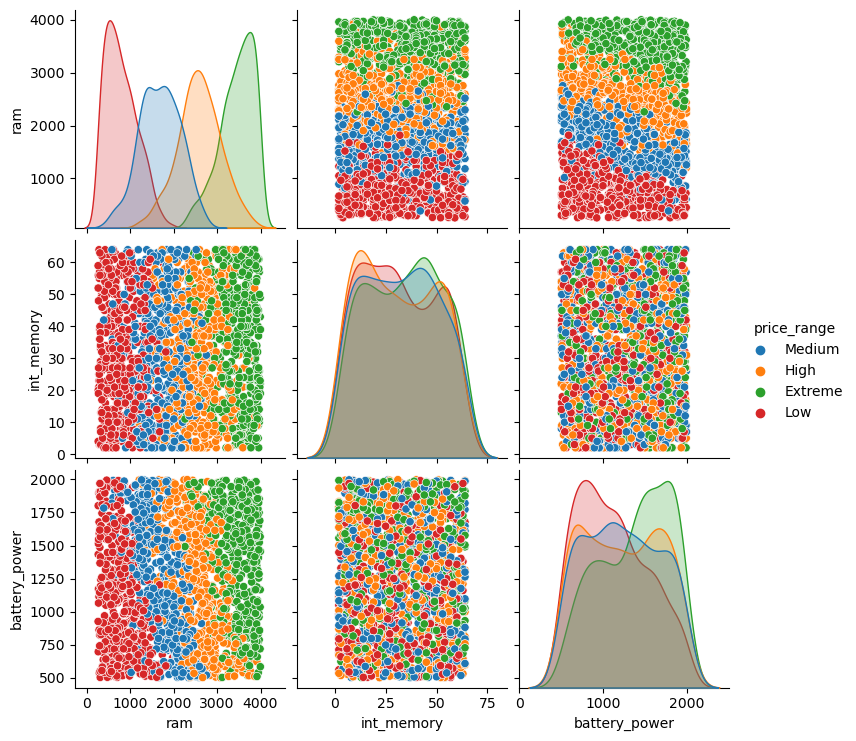

In [30]:
# Select the variables you want to include in the scatterplot matrix
features = ["ram", "int_memory", "battery_power", "price_range"]

# Create the scatterplot matrix
sns.pairplot(phones[features], hue="price_range")


There's a clear differentiation in the distribution of RAM across the different price ranges. Phones with higher RAM tend to belong to the 'High' price range, while those with lower RAM are more likely to be in the 'Low' or 'Medium' price range. This suggests that RAM is a significant factor in determining the price range of a phone.

## Histogram

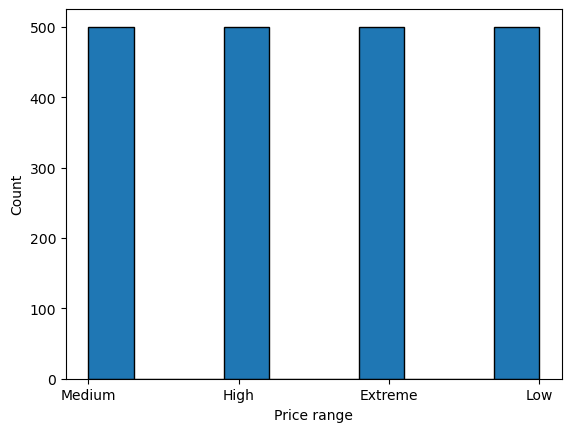

In [33]:
plt.hist(phones.price_range, edgecolor='black')
plt.xlabel('Price range')
plt.ylabel('Count')
plt.show()

The dataset is balanced : Mobile phones are divided with the same frequency across the 4 price_range classes. ( the use of the accuracy as a metric is justified)

## Boxplots

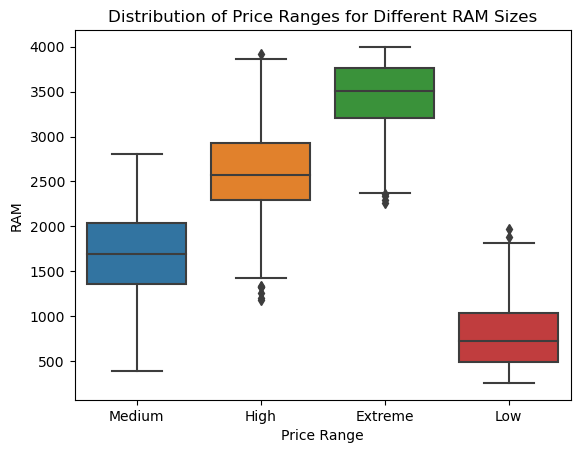

In [22]:
sns.boxplot(x='price_range', y='ram', data=phones)
plt.title('Distribution of Price Ranges for Different RAM Sizes')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()


## Violin plot for battery_power

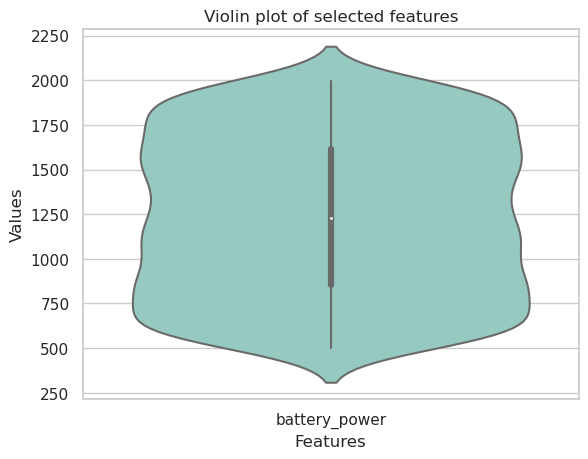

In [38]:
# Create a DataFrame with the features you want to plot
data = phones[['battery_power']]

# Create the violin plot
sns.set(style="whitegrid")
ax = sns.violinplot(data=data, palette="Set3")

# Set the title and axis labels
ax.set_title("Violin plot of selected features")
ax.set_xlabel("Features")
ax.set_ylabel("Values")

# Show the plot
plt.show()


# Training a network (Condor's Battery Power)


In this phase of our analysis, we'll address the critical task of determining the battery power for Phil's Phones' upcoming flagship phone, the Condor. Our goal is to ensure that the Condor's battery capacity aligns optimally with market expectations and profitability while meeting consumer demands. To achieve this, we'll follow a systematic approach:

1. **Focus on 'High' Priced Phones**: We will begin by narrowing our focus to 'high' priced phones within the dataset. This subset of data represents the primary market segment for the Condor.

2. **Data Splitting**: Next, we will split the data into training and testing sets, allocating 20% of the data for testing. We'll employ a random seed of 123 to ensure reproducibility.

3. **Model Exploration**: Our analysis will involve training a neural network model to predict battery power based on the quantitative characteristics of a phone. We'll assess the model's performance using the Mean Square Error (MSE) on the testing set.

4. **Model Variation**: To maximize the quality of our predictions, we will experiment with 3 alternative models. This exploration includes tuning various hyperparameters, optimizing activation functions, optimizers, dropout layers, learning rates, and network architecture.

5. **Model Comparison**: We'll conduct a rigorous comparative analysis of these models, evaluating their performance against each other. This step is crucial in determining which model is best suited to predict the Condor's battery power effectively.

By adhering to this structured approach, we aim to make informed decisions about the Condor's battery power, ensuring that it strikes the ideal balance between product excellence and profitability.

---

**Condor Phone Characteristics**

| Characteristic     | Value      |
|--------------------|------------|
| Clock Speed (GHz)  | 1.5        |
| Front Camera (MP)  | 4.5        |
| Internal Memory (GB)| 3.1       |
| Mobile Depth (cm)  | 0.5        |
| Mobile Weight (g)  | 143.6      |
| Number of Cores    | 4.7        |
| Primary Camera (MP)| 10         |
| Pixel Height (px)  | 632        |
| Pixel Width (px)   | 1234       |
| RAM (MB)           | 2582       |
| Screen Height (cm) | 12         |
| Screen Width (cm)  | 6          |
| Talk Time (hours)  | 11         |


In [53]:
# Preprocess the data
high_price_phones = phones[phones.price_range=='High']
X = high_price_phones.drop(columns=['battery_power', 'price_range'])
y = high_price_phones['battery_power']

# Normalize the input data
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

## Model 1

Epoch 0, Loss: 1710547.625
Epoch 1000, Loss: 63618.85546875
Epoch 2000, Loss: 59785.87890625
Epoch 3000, Loss: 12063.697265625
Epoch 4000, Loss: 55.66249084472656


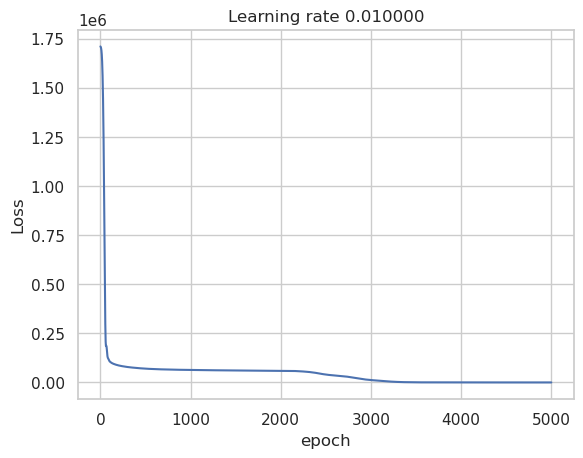

Test Mean Squared Error: 266540.46875


In [120]:
# Define the neural network architecture
model_1 = nn.Sequential(
    nn.Linear(13, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Define the loss function and optimizer
lr= 0.01
criterion = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(), lr=lr)

# Train the neural network
errors=[]
n_epochs = 5000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model_1(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    errors.append(loss.item())
   
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot the error curve
plt.figure(facecolor='w')
plt.plot(errors)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(lr))
plt.show()

# Evaluate the model on test data
y_test_pred = model_1(X_test_tensor)
test_loss = loss_fn(y_test_pred, y_test_tensor)
print(f"Test Mean Squared Error: {test_loss.item()}")  



# Model 2

Epoch 0, Loss: 1709697.625
Epoch 1000, Loss: 207887.125
Epoch 2000, Loss: 205344.15625
Epoch 3000, Loss: 200696.125
Epoch 4000, Loss: 194966.40625
Epoch 5000, Loss: 193594.015625
Epoch 6000, Loss: 194922.234375
Epoch 7000, Loss: 191888.296875
Epoch 8000, Loss: 199380.484375
Epoch 9000, Loss: 192105.296875


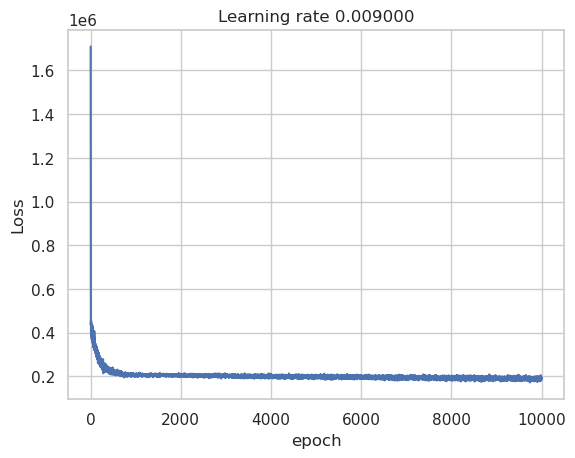

In [122]:
# Define the neural network model
model_2 = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.Sigmoid(),
    nn.Dropout(0.9),
    nn.Linear(128, 64),
    nn.Sigmoid(),
    nn.Dropout(0.9),
    nn.Linear(64, 1)
)

# Define the loss function and optimizer
lr=0.009
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model_2.parameters(), lr=lr)

# Train the model
errors=[]
n_epochs = 10000
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model_2(X_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    errors.append(loss.item())
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot the error curve
plt.figure(facecolor='w')
plt.plot(errors)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(lr))
plt.show()

## Model 3

We will preprocess & prepare the data for this model and the next one 

In [115]:
# Preprocess & prepare data : 
high_price_phones_7 = high_price_phones.drop(columns=['battery_power'])
p_num7 = high_price_phones_7.select_dtypes(include=[int, float])

# Initialize the input features scaler
input_features_scaler = StandardScaler()

# Fit and transform the input features using the scaler
p_num7 = input_features_scaler.fit_transform(p_num7)

# Convert p_num to a tensor.
p_num7 = torch.from_numpy(p_num7)
print(p_num7)

high_price_battery_power = torch.tensor(high_price_phones['battery_power'].values, dtype=torch.float32).view(-1, 1)

# Initialize the target variable scaler
target_scaler = StandardScaler()

# Fit and transform the target variable using the scaler
high_price_battery_power = target_scaler.fit_transform(high_price_battery_power)


tensor([[-1.2815, -1.0357,  1.1985,  ...,  1.1796, -0.6369, -0.7318],
        [-1.2815, -0.5752,  0.5471,  ..., -0.2388, -0.8715, -0.3633],
        [ 1.2073, -1.0357, -1.1355,  ...,  0.9432,  0.5364,  0.0052],
        ...,
        [ 0.0874, -0.1147,  0.5471,  ...,  0.4704, -1.1062,  0.0052],
        [ 0.3362,  1.7274,  0.1672,  ...,  0.2340, -0.6369, -1.2845],
        [ 1.3318, -1.0357,  0.4386,  ..., -0.2388,  1.0058,  0.9264]],
       dtype=torch.float64)


In [116]:
# Split the data into training, validation, and testing sets
X_train_hp, X_temp_hp, y_train_hp, y_temp_hp = train_test_split(p_num7, high_price_battery_power, test_size=0.2, random_state=123)
X_val_hp, X_test_hp, y_val_hp, y_test_hp = train_test_split(X_temp_hp, y_temp_hp, test_size=0.5, random_state=123)

X_train_hp_tensor = torch.tensor(X_train_hp, dtype=torch.float32)
y_train_hp_tensor = torch.tensor(y_train_hp, dtype=torch.float32)
X_val_hp_tensor = torch.tensor(X_val_hp, dtype=torch.float32)
y_val_hp_tensor = torch.tensor(y_val_hp, dtype=torch.float32)

Epoch 0, Loss: 1.0181125402450562


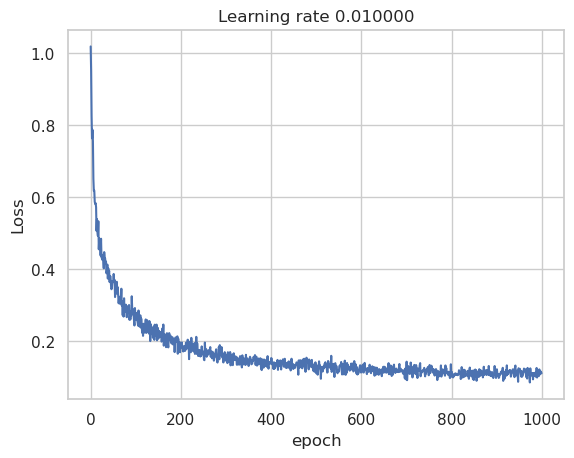

In [117]:
# Define your neural network, loss function, and optimizer
model_4 = nn.Sequential(
    nn.Linear(X_train_hp.shape[1], 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(64, 1)
)

lr=0.01
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_4.parameters(), lr=lr)

# Train the model
n_epochs = 1000
X_train_hp_tensor = torch.tensor(X_train_hp, dtype=torch.float32)
y_train_hp_tensor = torch.tensor(y_train_hp, dtype=torch.float32)

errors=[]
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred_hp = model_4(X_train_hp_tensor)
    loss = loss_fn(y_pred_hp, y_train_hp_tensor)
    loss.backward()
    optimizer.step()
    errors.append(loss.item())
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot the error curve
plt.figure(facecolor='w')
plt.plot(errors)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(lr))
plt.show()


## Best Model : model 

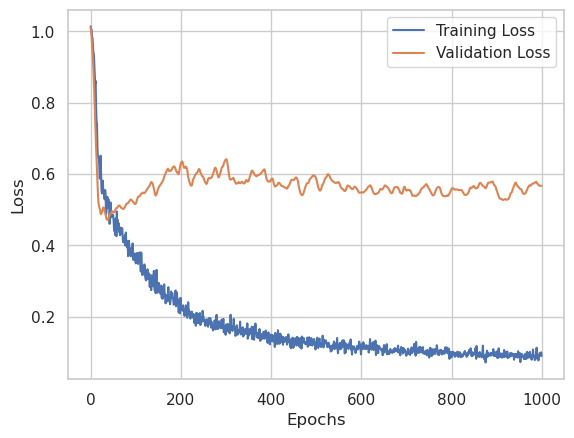

In [123]:
# Define a more complex model
model = nn.Sequential(
    nn.Linear(13, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(64, 1)
)

# Use a different learning rate
lr = 0.0001
optimizer = optim.Adam(model.parameters(), lr=lr)


n_epochs = 1000
train_losses = []
val_losses = []

lr=0.001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred_hp = model(X_train_hp_tensor)
    loss_train = loss_fn(y_pred_hp, y_train_hp_tensor)
    loss_train.backward()
    optimizer.step()
    train_losses.append(loss_train.item())

    model.eval()
    with torch.no_grad():
        y_val_pred_hp = model(X_val_hp_tensor)
        loss_val = loss_fn(y_val_pred_hp, y_val_hp_tensor)
        val_losses.append(loss_val.item())
        

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [124]:
print(val_losses[-1],train_losses[-1])

0.567328929901123 0.08973366022109985


In [126]:
# Create a NumPy array with the provided characteristics of the Condor phone
condor_data = np.array([[1.5, 4.5, 3.1, 0.5, 143.6, 4.7, 10, 632, 1234, 2582, 12, 6, 11]])

# Apply the saved input_features_scaler to normalize the input data
condor_data_normalized = input_features_scaler.transform(condor_data)

# Convert the normalized data to a PyTorch tensor
condor_data_hp_tensor = torch.tensor(condor_data_normalized, dtype=torch.float32)

# Use the trained model to make a prediction
model.eval()
with torch.no_grad():
    predicted_battery_power_hp = model(condor_data_hp_tensor)

# Re-transform the predicted battery power from normalized to original scale
predicted_battery_power_hp = target_scaler.inverse_transform(predicted_battery_power_hp)

# Predict the battery power the Condor using the best model which is : Model
print(f"Predicted battery power for the Condor phone: {int(round(predicted_battery_power_hp.item()))} mAh")


Predicted battery power for the Condor phone: 1255 mAh


# Price Classification

In the wake of a recent global pandemic and mobile phone materials shortage, the mobile phone market has become highly unpredictable. Accurate pricing has become a challenge, leading Phil's Phones to focus exclusively on phones predicted to fall within the 'high' or 'extreme' price categories. In response, our task is to build a model that can accurately predict the price category of a phone based on its characteristics. Our approach includes:

* Training and Testing Split
* Model Training for Price Classification
* Accuracy Calculation
* Identifying Phones with Desired Price Categories
* Recommending Phones for Purchase

In [127]:
X = p_num
y = p_price


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [128]:

classification_model = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.Sigmoid(),
    nn.Linear(128, 64),
    nn.Sigmoid(),
    nn.Linear(64, 32),
    nn.Sigmoid(),
    nn.Linear(32, 4),
    nn.Softmax(dim=1)
)

lr_2 =0.005
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(classification_model.parameters(), lr=lr_2)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

errors_2=[]
n_epochs = 500
for epoch in range(n_epochs):
    optimizer.zero_grad()
    outputs = classification_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    errors_2.append(loss.item())
    optimizer.step()


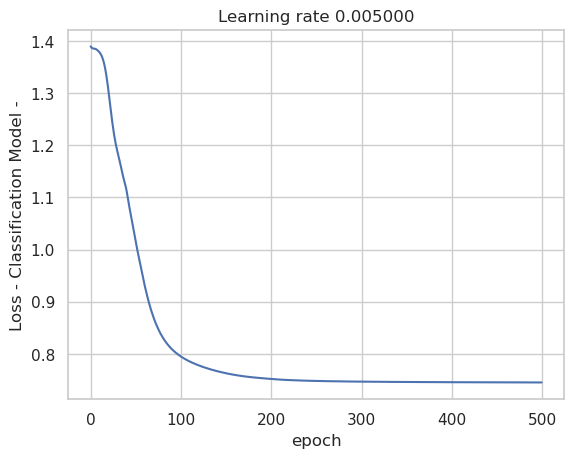

In [129]:
plt.figure(facecolor='w')
plt.plot(errors_2)
plt.ylabel('Loss - Classification Model -')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(lr_2))
plt.show()

In [130]:
# Accuracy : Evaluate the model 

y_test_pred = classification_model(X_test_tensor)
_, predicted = torch.max(y_test_pred, 1)
correct = (predicted == y_test_tensor).sum().item()
accuracy  = correct / len(y_test) * 100

print(f"Accuracy: {accuracy:.2f}%")



Accuracy: 94.75%


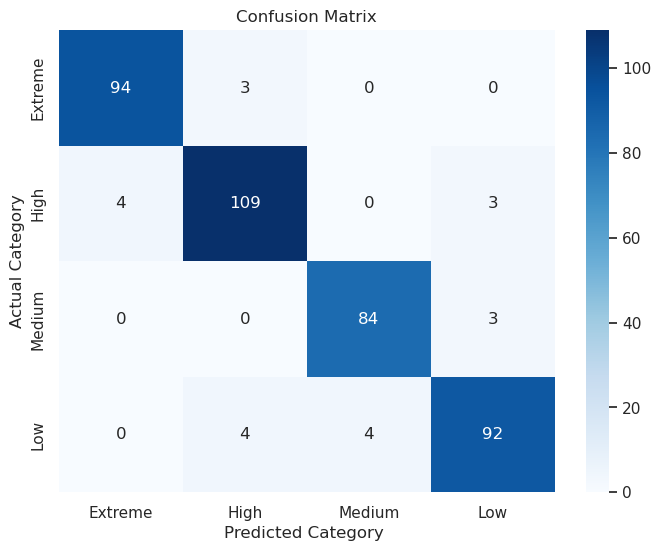

In [131]:

# Define category names
category_names = ['Extreme', 'High', 'Medium', 'Low']

# Get the confusion matrix
cm = confusion_matrix(y_test, predicted)

# Plot the confusion matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=category_names, yticklabels=category_names, ax=ax)

# Set the plot title and axis labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Category ')
ax.set_ylabel('Actual Category')

plt.show()


In [132]:
p_hi_ex = y_test[(predicted == 0) | (predicted == 1)]
print(len(p_hi_ex))

214


In [155]:
# Identify which phones are predicted to be worth more than their advertised price
predicted_categories = le.inverse_transform(predicted)
actual_categories = le.inverse_transform(y_test)
recommended_phones = np.where(predicted_categories < actual_categories)[0]

print(f"Phones to recommend for purchase: {p_hi_ex}")
print(f"Phones predicted to be worth more than advertised: {recommended_phones}")

Phones to recommend for purchase: [0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 3
 1 1 1 1 1 0 0 1 0 0 3 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 3
 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 1 1 1 0 3 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1]
Phones predicted to be worth more than advertised: [ 63  84 104 124 134 141 151 217 292 294 326 366]


# Outlier detection


In this question, we venture into outlier detection using an autoencoder. Our objective is to identify phones in the dataset that deviate significantly from the norm. We'll employ an autoencoder with a bottleneck layer of 3 neurons to accomplish this task. The approach involves:
* Training an Autoencoder for Outlier Detection
* Utilizing a Histogram for Outlier Identification
* Determining the Number of Outliers
* Justifying the Two Most Anomalous Phones

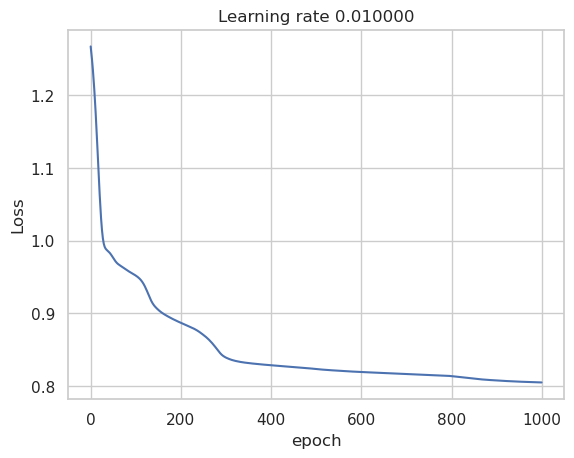

0.8047471642494202


In [138]:
p_num_tensor = torch.tensor(p_num, dtype=torch.float32)

class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        
        self.encoder = nn.Sequential(
            nn.Linear(14, 7),
            nn.Sigmoid(),
            nn.Linear(7, 3)
        )
        self.decoder = nn.Sequential(
            nn.Linear(3, 7),
            nn.ReLU(),
            nn.Linear(7, 14),
            nn.Sigmoid()
        )
 
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded,encoded

model_test = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model_test.parameters(),
                             lr = 0.01,
                             weight_decay = 1e-8)

errors = []
for epoch in range(1000):
    pred_y,encoded = model_test(p_num_tensor)
    curr_error = loss_function(pred_y, p_num_tensor)
    errors.append(curr_error.item())

    model_test.zero_grad()
    curr_error.backward()

    optimizer.step()

plt.figure(facecolor='w')
plt.plot(errors)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(0.01))
plt.show()

print(errors[-1])

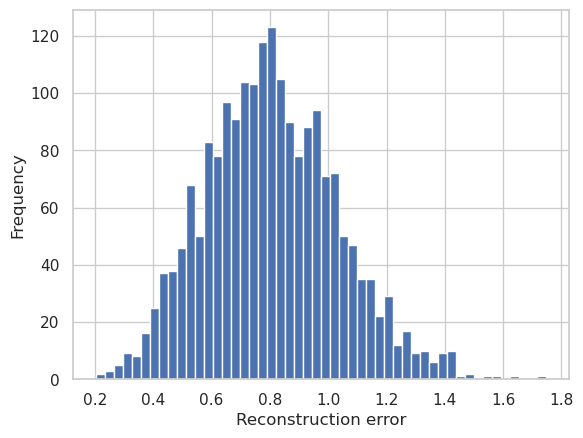

In [139]:
# First lets plot the MSE values
model_test.eval()
with torch.no_grad():
    mse_per_instance = (p_num - pred_y).pow(2).mean(axis=1).numpy()
    
plt.hist(mse_per_instance, bins=50)
plt.xlabel("Reconstruction error")
plt.ylabel("Frequency")
plt.show()

In [140]:
print("Average MSE is ", np.mean(mse_per_instance))

Average MSE is  0.8047471876758662


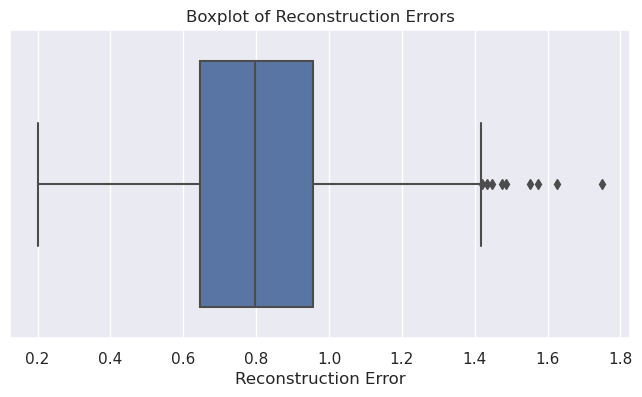

In [141]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
sns.boxplot(x=mse_per_instance)
plt.xlabel('Reconstruction Error')
plt.title('Boxplot of Reconstruction Errors')
plt.show()


In [142]:
# IQR method to detect outliers : 

# The first quartile (Q1) and the third quartile (Q3)
Q1 = np.percentile(mse_per_instance, 25)
Q3 = np.percentile(mse_per_instance, 75)

# The interquartile range (IQR)
IQR = Q3 - Q1

# The lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = mse_per_instance[(mse_per_instance < lower_bound) | (mse_per_instance > upper_bound)]

# Print the number of outliers and their values
print(f"Number of outliers: {len(outliers)}")
print(f"Outlier values: {outliers}")


Number of outliers: 9
Outlier values: [1.48691615 1.62542522 1.55200987 1.42051053 1.47427603 1.74883711
 1.44731561 1.43372959 1.57489364]


In [144]:
# The two most anomalous phones
top_anomalous_indices = mse_per_instance.argsort()[-2:][::-1]
print(f"Indices of the two most anomalous phones: {top_anomalous_indices}")

N = len(p_num)

AS = np.argsort(mse_per_instance,0) # Specify dimension 0 to sort along rows
outlier1 = int(AS[N-1]) # Need to use N-1 since indexing starts from 0
outlier2 = int(AS[N-2])
print("The observation at index ", outlier1, " had an MSE of ", mse_per_instance[outlier1]) 
print("The observation at index ", outlier2, " had an MSE of ", mse_per_instance[outlier2])

Indices of the two most anomalous phones: [1441  226]
The observation at index  1441  had an MSE of  1.7488371139357675
The observation at index  226  had an MSE of  1.6254252243055478


In [145]:
phones.iloc[top_anomalous_indices]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1441,599,2.9,0,64,0.3,186,8,1,103,646,3396,5,3,7,High
226,1708,2.4,18,49,0.1,109,1,19,233,517,3388,6,4,16,Extreme


**Phone 1:**

Sc_h (Screen Height of mobile in cm) and Sc_w (Screen Width of mobile in cm) are quite low (5 and 3), suggesting a very small screen size compared to typical smartphones.
The phone's price range is "High", but it has some low-end features like front camera and screen size. 

**Phone 2:**

N_cores (Number of cores of the processor) is 1, which is quite low compared to modern smartphones that usually have multiple cores for better performance.
Mobile_wt (Weight of mobile phone) is 109, which is relatively light compared to other smartphones with similar specs.
The phone's price range is "Extreme", but it has some lower-end features like the number of processor cores. 

**==>**  these phones should not be considered as outliers, as some of their unusual features can be found in other phones within the dataset. For example, having no front camera (Fc) is not that uncommon.

# Dimensionality reduction


this part addresses the desire to visualize all the variables simultaneously, which isn't feasible. However, we propose using an autoencoder to condense the 14 quantitative columns into just three for plotting. The steps include:
* Extracting the Bottleneck Layer from the Autoencoder
* Creating a 3D Scatterplot with Autoencoder Dimensions
* Comparing Visualizations with Q6 and Drawing Conclusions

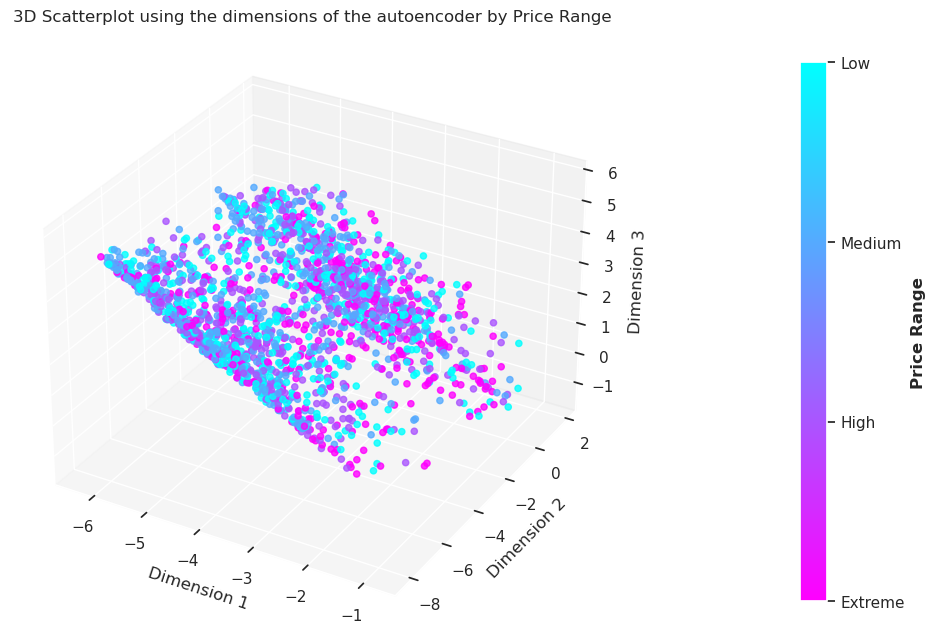

In [147]:
# Extract the bottleneck layer from the autoencoder
model_test.eval()
with torch.no_grad():
    _, encoded_data = model_test(p_num_tensor)

# Convert the encoded data to NumPy format
encoded_data = encoded_data.numpy()

# Create a 3D scatterplot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for the price categories
colors = {'Low': 'blue', 'Medium': 'green', 'High': 'yellow', 'Extreme': 'red'}
price_colors = [colors[p] for p in phones.price_range]

# Plot the encoded data
ax.scatter(encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2], c=p_price, marker='o', alpha=0.8, cmap ='cool_r')

# Set labels
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Set title
ax.set_title('3D Scatterplot using the dimensions of the autoencoder by Price Range')

# Colorbar
colorbar = fig.colorbar(scatter, ticks=[0, 1, 2, 3], pad=0.2, shrink=0.7)
colorbar.set_label('Price Range', fontdict={'weight': 'bold'})
colorbar.ax.set_yticklabels(category_names)

# Set the background color to white
ax.set_facecolor('white')

plt.show()


Although it may seem counterintuitive, the autoencoder did not produce a better 3D plot in this case. This outcome could be due to several reasons, such as the architecture of the autoencoder, the choice of hyperparameters, or the complexity of the dataset. It's important to note that the performance of machine learning models, including autoencoders, can be highly dependent on the specific problem and dataset they are applied to.

In this case, it might be worthwhile to investigate alternative techniques or adjustments to the autoencoder's architecture and hyperparameters to improve the visual representation of the data in the 3D plot. Ultimately, while autoencoders can often provide insightful visualizations, there is no guarantee that they will always yield better results than other methods.

# Conclusion

In conclusion, this project provided a comprehensive exploration of mobile phone data, from understanding the dataset's attributes to employing various data analysis and machine learning techniques. We delved into descriptive statistics, data visualization, predictive modeling, and outlier detection, gaining valuable insights into the mobile phone market. By applying these methods, we equipped Phil's Phones with the knowledge and tools needed to make informed business decisions and thrive in this competitive industry.